# TASK 2- MOVIE RATING PREDICTION WITH PYTHON
---- 
### A MOHAMED AABIDH
----

## Importing packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Loading the dataset

In [2]:
df_movie = pd.read_csv('movies.dat', sep='::', engine='python', encoding='latin-1')
df_movie.columns = ['MovieIDs', 'MovieName', 'Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
df_movie.shape

(3882, 3)

In [4]:
df_rating = pd.read_csv("ratings.dat",sep='::', engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [5]:
df_rating.shape

(1000208, 4)

In [6]:
df_user = pd.read_csv("users.dat",sep='::',engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [7]:
df_user.shape

(6039, 5)

## Concatnating or Joinig the datasets 

In [8]:
main_df=pd.concat([df_movie,df_rating,df_user],axis=1)

In [9]:
main_df 

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
...,...,...,...,...,...,...,...,...,...,...,...,...
1000203,NaN,NaN,NaN,6040,1091,1,956716541,NaN,NaN,NaN,NaN,NaN
1000204,NaN,NaN,NaN,6040,1094,5,956704887,NaN,NaN,NaN,NaN,NaN
1000205,NaN,NaN,NaN,6040,562,5,956704746,NaN,NaN,NaN,NaN,NaN
1000206,NaN,NaN,NaN,6040,1096,4,956715648,NaN,NaN,NaN,NaN,NaN


In [11]:
#checking for null vaules
main_df.isnull().sum()

MovieIDs      996326
MovieName     996326
Category      996326
ID                 0
MovieID            0
Ratings            0
TimeStamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [12]:
final_df=main_df.dropna()

In [13]:
# Droping the null values
final_df.isnull().sum()

MovieIDs      0
MovieName     0
Category      0
ID            0
MovieID       0
Ratings       0
TimeStamp     0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [32]:
final_df.shape

(3882, 12)

In [14]:
#converting the categorical variables into numerical format
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
final_df['Gender']=labelencoder.fit_transform(final_df['Gender'])
final_df.head()

C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_9264\3589535847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Gender']=labelencoder.fit_transform(final_df['Gender'])


,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0,50.0,9.0,55117


## Visualization 

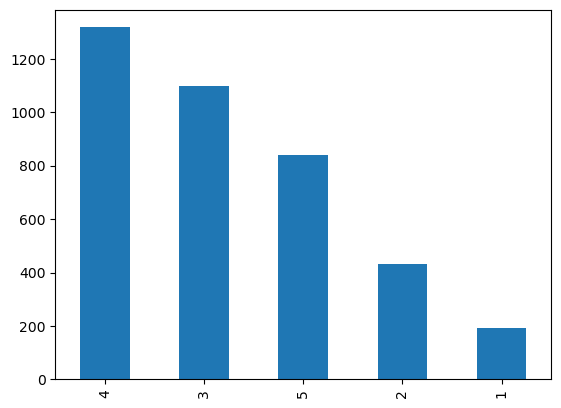

In [15]:
# Top given rating 
final_df['Ratings'].value_counts().plot(kind='bar')
plt.show()

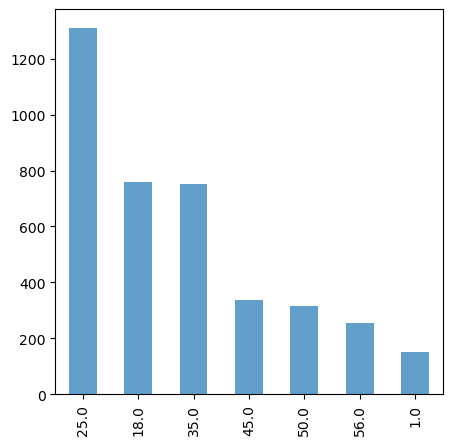

In [16]:
#Visualize user age distribution
final_df['Age'].value_counts().plot(kind='bar',alpha=0.7,figsize=(5,5))
plt.show()

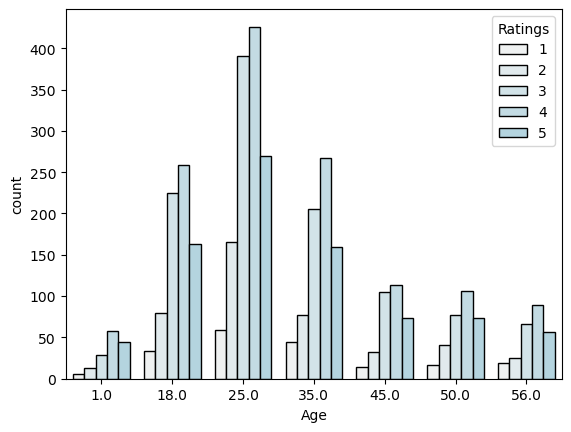

In [17]:
sns.countplot(x=final_df['Age'],hue=final_df['Ratings'],color = "lightblue",edgecolor = "black");

## Model Predction

### Splliting the data into features and target

In [18]:
#Use the following features:movie id,age,occupation
features = final_df[['MovieID','Age','Occupation']].values

In [19]:
#Use rating as label
labels =final_df [['Ratings']].values

In [30]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)


## Logistic Regression

In [21]:
# Logistic Regression

logreg = LogisticRegression()

In [22]:
logreg.fit(train, train_labels)

C:\Users\Abdul Rahman\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abdul Rahman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
Y_pred = logreg.predict(test)

In [24]:
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

34.31

## Random Forest
 It combines multiple decision trees during training to create a robust and accurate model. Each tree is built on a random subset of the training data and a random subset of features, ensuring diversity and reducing overfitting. During prediction, the individual tree outputs are aggregated to make a final decision. Random Forest is versatile, capable of handling both classification and regression tasks. It excels in handling high-dimensional data and is known for its accuracy, stability, and resistance to overfitting, making it a valuable tool for various real-world applications.

In [25]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)

C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_9264\2264456351.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(train, train_labels)


RandomForestClassifier()

In [26]:
Y_pred = random_forest.predict(test)

In [27]:
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

98.0